# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [46]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key




# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [26]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 611


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [19]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"


In [20]:
# Starting URL for Weather Map API call
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"
# Print (url)


# List of City Data
city_data = []

# Print to logger
print("Beginning Data Retrieval")
print ("-" * 15)


# Create counters
record_count = 1
set_count = 1
# Loop through all the cities in list
for index, city in enumerate(cities):
    # Group cities in sets of 50 for loggin purpose
    if (index % 50 == 0 and index >= 50):
        set_count += 1
        record_count = 0
    # Create endpoint URL with each city
    city_url = url + "&q=" + city

    
    # Log the URL and set number
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    record_count += 1
    
    # Run an API request for each of the cities
    try:
        
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        
        # Extract out max temp humidity and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Append the city info into the city data list
        city_data.append({
            "City" :city,
            "Lat" :city_lat,
            "Lng" :city_lng,
            "Max Temp" :city_max_temp,
            "Humidity" :city_humidity,
            "Cloudiness" :city_clouds,
            "Windspeed" :city_wind,
            "Country" :city_country,
            "Date" :city_date  
        })
    except:
        print("City not found. Skipping ...")
        pass
    # Indicate that data loading is complete
        print("-----------------------")
        print("Data Retrieval Complete")
        print("-----------------------")

Beginning Data Retrieval
---------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | thinadhoo
Processing Record 4 of Set 1 | havre de grace
Processing Record 5 of Set 1 | faanui
Processing Record 6 of Set 1 | puerto escondido
Processing Record 7 of Set 1 | torbay
Processing Record 8 of Set 1 | wenatchee
Processing Record 9 of Set 1 | meulaboh
Processing Record 10 of Set 1 | taolanaro
City not found. Skipping ...
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 11 of Set 1 | tasiilaq
Processing Record 12 of Set 1 | harper
Processing Record 13 of Set 1 | vaini
Processing Record 14 of Set 1 | hermanus
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | east london
Processing Record 17 of Set 1 | attawapiskat
City not found. Skipping ...
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 18 of Set 1 | vila velha
Processin

Processing Record 13 of Set 4 | tuktoyaktuk
Processing Record 14 of Set 4 | bouna
Processing Record 15 of Set 4 | kazalinsk
City not found. Skipping ...
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 16 of Set 4 | marzuq
Processing Record 17 of Set 4 | bredasdorp
Processing Record 18 of Set 4 | iqaluit
Processing Record 19 of Set 4 | havoysund
Processing Record 20 of Set 4 | mandalgovi
Processing Record 21 of Set 4 | olafsvik
Processing Record 22 of Set 4 | khatanga
Processing Record 23 of Set 4 | ban dung
Processing Record 24 of Set 4 | chapais
Processing Record 25 of Set 4 | port hedland
Processing Record 26 of Set 4 | sioux lookout
Processing Record 27 of Set 4 | port hardy
Processing Record 28 of Set 4 | lagoa da canoa
Processing Record 29 of Set 4 | sangar
Processing Record 30 of Set 4 | kinablangan
Processing Record 31 of Set 4 | merritt island
Processing Record 32 of Set 4 | kalmunai
Processing Record 33 of Set 4 | tibacuy
Processing Re

Processing Record 31 of Set 7 | weyburn
Processing Record 32 of Set 7 | hienghene
Processing Record 33 of Set 7 | ponta do sol
Processing Record 34 of Set 7 | miranorte
City not found. Skipping ...
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 35 of Set 7 | roma
Processing Record 36 of Set 7 | kamyshin
Processing Record 37 of Set 7 | hauterive
Processing Record 38 of Set 7 | papara
Processing Record 39 of Set 7 | hovd
Processing Record 40 of Set 7 | yurimaguas
Processing Record 41 of Set 7 | dhidhdhoo
Processing Record 42 of Set 7 | tazovskiy
Processing Record 43 of Set 7 | bulawayo
Processing Record 44 of Set 7 | plouzane
Processing Record 45 of Set 7 | pithiviers
Processing Record 46 of Set 7 | ust-koksa
Processing Record 47 of Set 7 | dikson
Processing Record 48 of Set 7 | touros
Processing Record 49 of Set 7 | codrington
Processing Record 0 of Set 8 | leshukonskoye
Processing Record 1 of Set 8 | itarema
Processing Record 2 of Set 8 | mach

Processing Record 49 of Set 10 | nuuk
Processing Record 0 of Set 11 | kysyl-syr
Processing Record 1 of Set 11 | baran
Processing Record 2 of Set 11 | coxim
Processing Record 3 of Set 11 | mys shmidta
City not found. Skipping ...
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 4 of Set 11 | hasaki
Processing Record 5 of Set 11 | sokoni
Processing Record 6 of Set 11 | vardo
Processing Record 7 of Set 11 | durham
Processing Record 8 of Set 11 | metz
Processing Record 9 of Set 11 | challapata
Processing Record 10 of Set 11 | geraldton
Processing Record 11 of Set 11 | paradwip
City not found. Skipping ...
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 12 of Set 11 | dutlwe
Processing Record 13 of Set 11 | soure
Processing Record 14 of Set 11 | buenos aires
Processing Record 15 of Set 11 | avera
Processing Record 16 of Set 11 | provideniya
Processing Record 17 of Set 11 | valente
Processing Record 18 of Set 

In [33]:
# Convert the cities weather data into a Pandas DataFrame
# Convert array of JSON into Pandas
city_data_df = pd.DataFrame(city_data)


# Extract relevant fields from the data frame
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Windspeed"]


city_data_df.count()



City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
Windspeed     563
Country       563
Date          563
dtype: int64

In [34]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
0,punta arenas,-53.1500,-70.9167,48.31,71,0,19.57,CL,1678052512
1,rikitea,-23.1203,-134.9692,79.90,74,100,21.88,PF,1678052255
2,thinadhoo,0.5333,72.9333,80.47,75,88,4.25,MV,1678052514
3,havre de grace,39.5493,-76.0916,61.03,45,20,9.73,US,1678052514
4,faanui,-16.4833,-151.7500,83.43,72,91,17.85,PF,1678052514


In [47]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [48]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
City_ID,,,,,,,,,
0,punta arenas,-53.1500,-70.9167,48.31,71,0,19.57,CL,1678052512
1,rikitea,-23.1203,-134.9692,79.90,74,100,21.88,PF,1678052255
2,thinadhoo,0.5333,72.9333,80.47,75,88,4.25,MV,1678052514
3,havre de grace,39.5493,-76.0916,61.03,45,20,9.73,US,1678052514
4,faanui,-16.4833,-151.7500,83.43,72,91,17.85,PF,1678052514


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

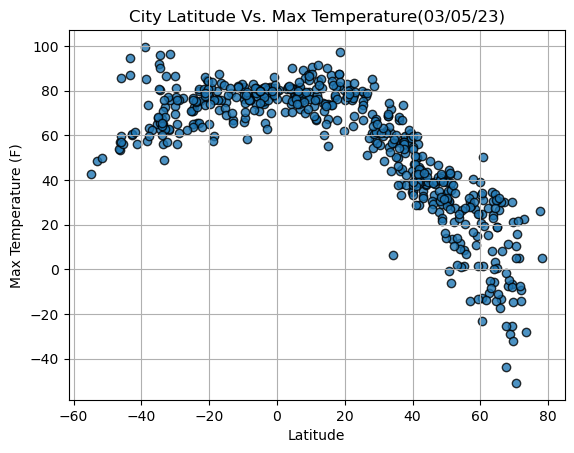

In [50]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats,
            max_temps,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Max Temperature(%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

 Latitude Vs. Humidity

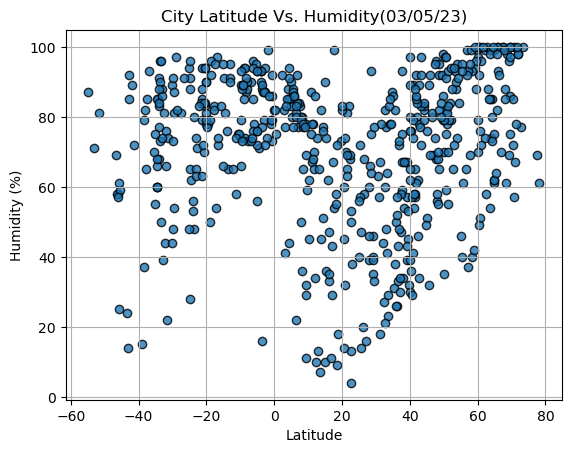

In [51]:
# Build scatter plot for latitude vs. Humidity
plt.scatter(lats,
            humidity,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title("City Latitude Vs. Humidity(%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

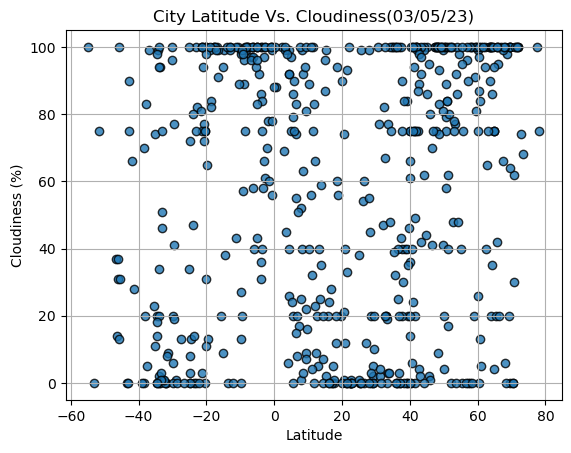

In [52]:
# Build scatter plot for latitude vs. Cloudiness
plt.scatter(lats,
            cloudiness,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title("City Latitude Vs. Cloudiness(%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

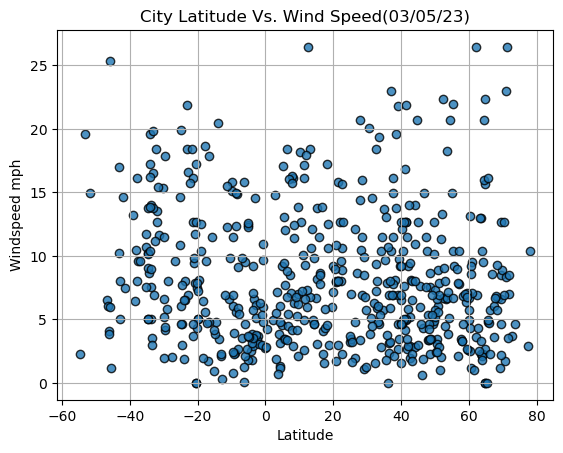

In [53]:
# Build scatter plot for latitude vs. Windspeed
plt.scatter(lats,
            wind_speed,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title("City Latitude Vs. Wind Speed(%s)" % time.strftime("%x"))
plt.ylabel("Windspeed mph")
plt.xlabel("Latitude")
plt.grid(True)


# Save figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [59]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values,title,text_coordinates):
    
    # Run regression on Southern Hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    #plt.ylabel("Title")
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [60]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
City_ID,,,,,,,,,
2,thinadhoo,0.5333,72.9333,80.47,75,88,4.25,MV,1678052514
3,havre de grace,39.5493,-76.0916,61.03,45,20,9.73,US,1678052514
5,puerto escondido,15.8500,-97.0667,86.83,62,20,11.50,MX,1678052515
6,torbay,47.6666,-52.7314,25.68,68,75,10.36,CA,1678052515
7,wenatchee,47.4235,-120.3103,46.78,74,100,11.50,US,1678052515


In [61]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
City_ID,,,,,,,,,
0,punta arenas,-53.1500,-70.9167,48.31,71,0,19.57,CL,1678052512
1,rikitea,-23.1203,-134.9692,79.90,74,100,21.88,PF,1678052255
4,faanui,-16.4833,-151.7500,83.43,72,91,17.85,PF,1678052514
11,vaini,-21.2000,-175.2000,78.96,94,100,12.66,TO,1678052517
12,hermanus,-34.4187,19.2345,62.80,85,99,8.68,ZA,1678052517


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.8883049319552815


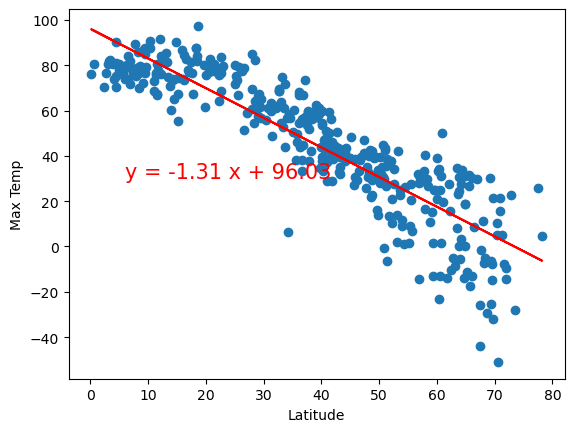

In [62]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Max Temp"]
plt.ylabel("Max Temp")
plot_linear_regression(x_values,y_values, 'Max Temp', (6,30))

The r-squared is: 0.43419883048320645


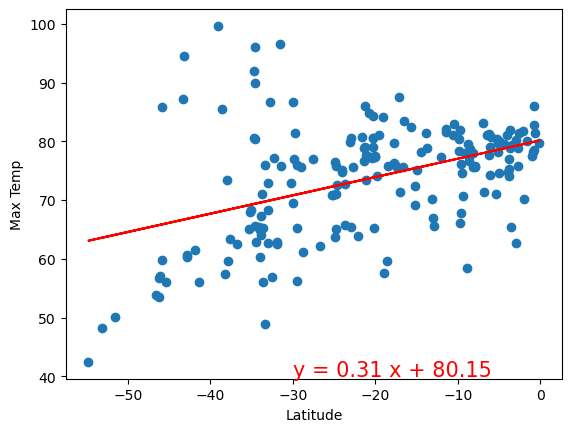

In [63]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Max Temp"]
plt.ylabel("Max Temp")
plot_linear_regression(x_values,y_values, 'Max Temp', (-30,40))

**Discussion about the linear relationship:** These graphs are showing the relationship between temperatures and latitude. For the northern hemisphere there is negative correlation with temperatures higher as latitude gets lower. The R value of -.88 implys a very strong negative coorelation. The Southern hemishphere has a positive coorelation with temperatures increasing as latitude increasing but the shows a weak coorelattion with an R value of .4. These graphs are showing that teperatures tend to be higher closer to the equator, and lower as you move away from the equator on either side but the southern hemisphere has a much weaker correlation, with some ares still expirinecing high temperatures further from the equator.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.32648115333133515


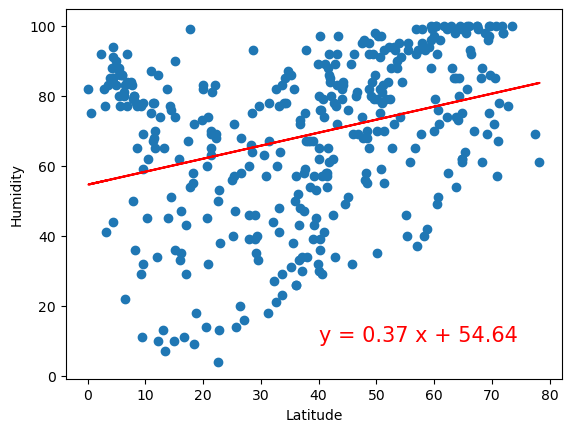

In [64]:
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Humidity"]
plt.ylabel("Humidity")
plot_linear_regression(x_values,y_values, 'Humidity', (40,10))

The r-squared is: 0.33482580955274405


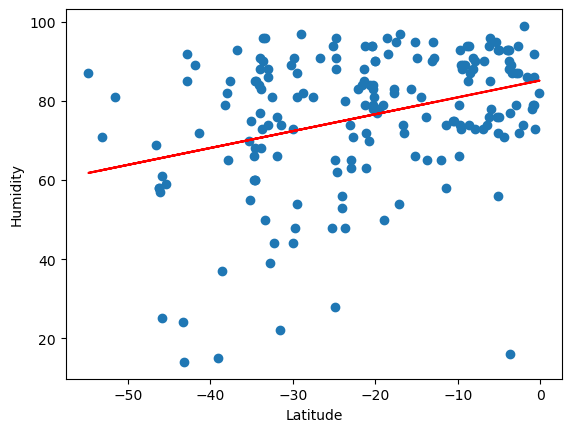

In [65]:
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Humidity"]
plt.ylabel("Humidity")
plot_linear_regression(x_values,y_values, 'Humidity', (-30,150))

**Discussion about the linear relationship:** For the humidity graphs there is a weak coorelation for both the southern and northern hemispheres. This is show by the R value of .3 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.2738526188184621


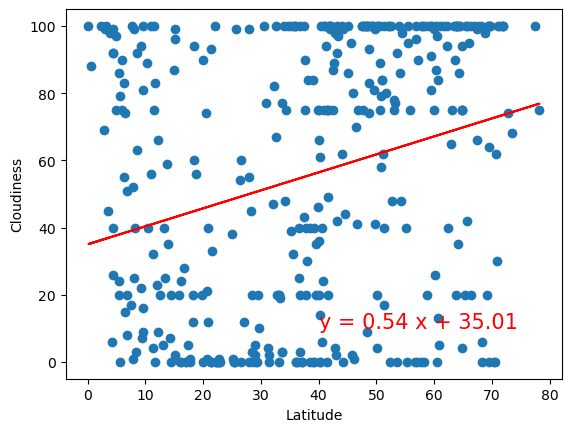

In [66]:
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Cloudiness"]
plt.ylabel("Cloudiness")
plot_linear_regression(x_values,y_values, 'Cloudiness', (40,10))

The r-squared is: 0.45018005450070026


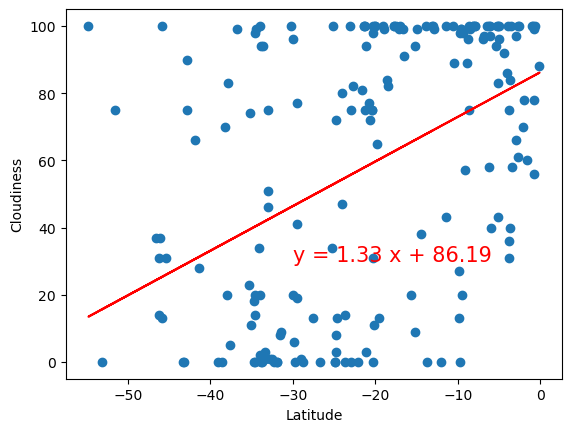

In [67]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Cloudiness"]
plt.ylabel("Cloudiness")
plot_linear_regression(x_values,y_values, 'Cloudiness', (-30,30))


**Discussion about the linear relationship:** for cloudiness in the northern hemishphere there is a very weak coorelation with an r value of .2, and a weak coorelation in the southern hemisphere with an r value of .4

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: -0.06311005855362004


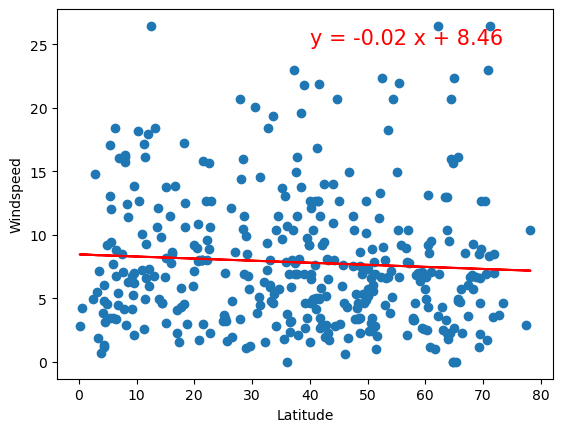

In [68]:
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Windspeed"]
plt.ylabel("Windspeed")
plot_linear_regression(x_values,y_values, 'Windspeed', (40,25))

The r-squared is: -0.29183487627542065


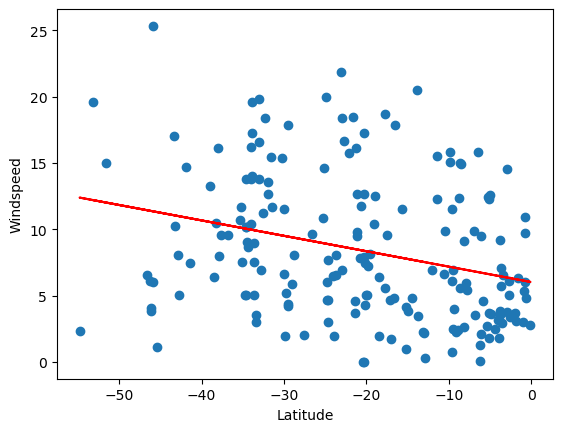

In [69]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Windspeed"]
plt.ylabel("Windspeed")
plot_linear_regression(x_values,y_values, 'Windspeed', (-30,30))

**Discussion about the linear relationship:** for wind spped for both hemispheres there is a very weak coorelation- almost none in the northern hemisphere with an r value of .06 